In [1]:
from preprocess import preprocess_data, load_data, create_dataloaders

data = load_data("data/diabetes_prediction_dataset.csv")
train_data, test_data = preprocess_data(data, as_tensor= False)


Logistic Regression Coefficients and Standard Deviations:
gender: Coefficient = 1.0554
age: Coefficient = 0.1869
hypertension: Coefficient = 0.1443
heart_disease: Coefficient = 0.5871
smoking_history: Coefficient = 2.4918
bmi: Coefficient = 1.3568
HbA1c_level: Coefficient = 0.1267
blood_glucose_level: Coefficient = -0.0341
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[18127   165]
 [  654  1054]]


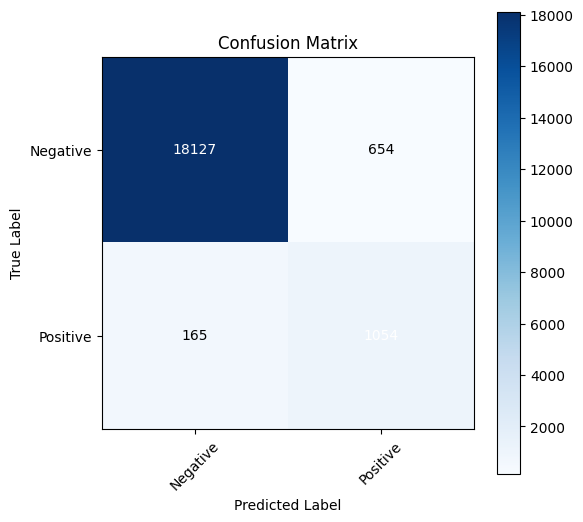

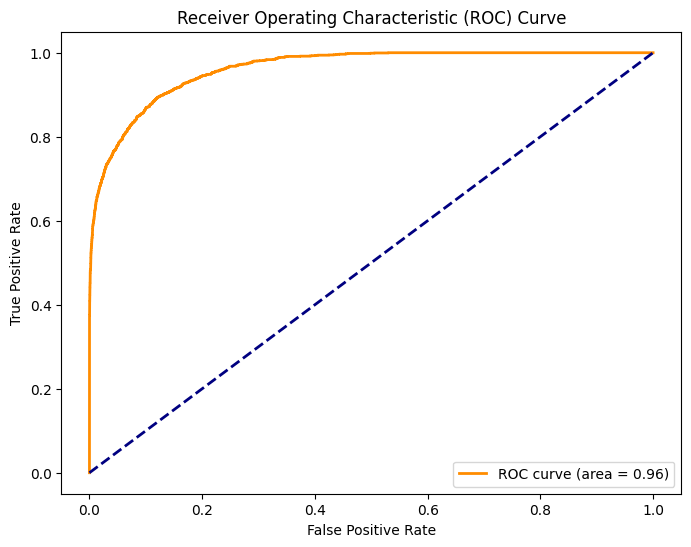

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

(X_train, y_train), (X_test, y_test)  = train_data, test_data
feature_names = data.drop(columns=['diabetes']).columns

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print("Logistic Regression Coefficients and Standard Deviations:")
for feature, coef in zip(feature_names, model.coef_[0]):
    print(f"{feature}: Coefficient = {coef:.4f}")

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(2), ["Negative", "Positive"], rotation=45)
plt.yticks(np.arange(2), ["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.text(0, 0, conf_matrix[0, 0], ha="center", va="center", color="white")
plt.text(0, 1, conf_matrix[0, 1], ha="center", va="center", color="black")
plt.text(1, 0, conf_matrix[1, 0], ha="center", va="center", color="black")
plt.text(1, 1, conf_matrix[1, 1], ha="center", va="center", color="white")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Feature Importances:
gender: Importance = 0.1004
age: Importance = 0.0146
hypertension: Importance = 0.0107
heart_disease: Importance = 0.1220
smoking_history: Importance = 0.3971
bmi: Importance = 0.3296
HbA1c_level: Importance = 0.0070
blood_glucose_level: Importance = 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18226    66]
 [  535  1173]]


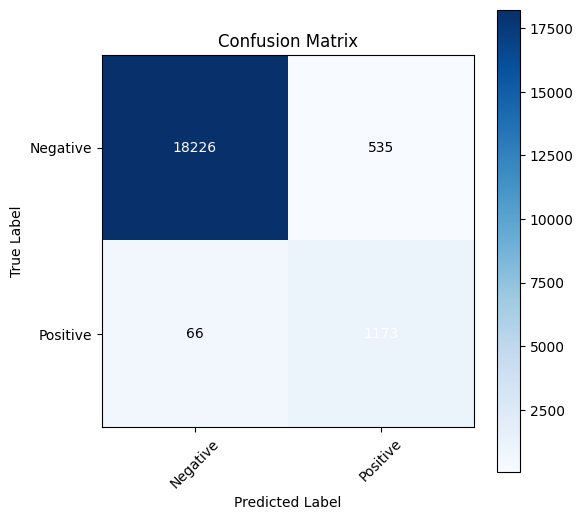

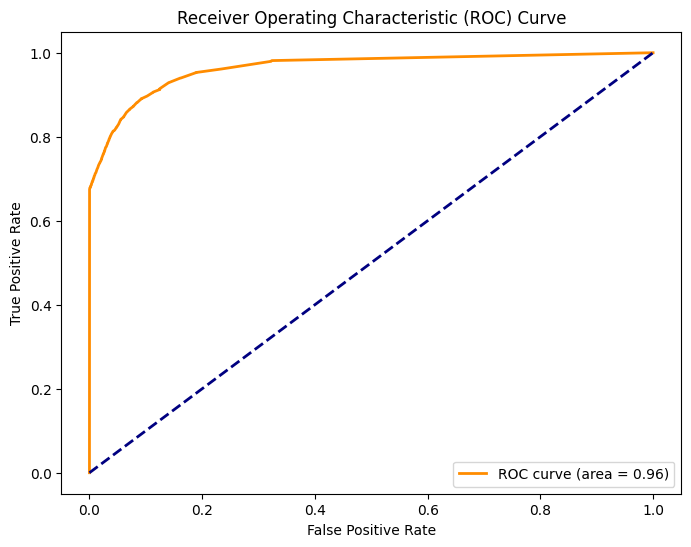

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming train_data and test_data are tuples of (X, y)
(X_train, y_train), (X_test, y_test) = train_data, test_data

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print feature importances
feature_names = data.drop(columns=['diabetes']).columns
print("Feature Importances:")
for feature, importance in zip(feature_names, model.feature_importances_):
    print(f"{feature}: Importance = {importance:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(2), ["Negative", "Positive"], rotation=45)
plt.yticks(np.arange(2), ["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.text(0, 0, conf_matrix[0, 0], ha="center", va="center", color="white")
plt.text(0, 1, conf_matrix[0, 1], ha="center", va="center", color="black")
plt.text(1, 0, conf_matrix[1, 0], ha="center", va="center", color="black")
plt.text(1, 1, conf_matrix[1, 1], ha="center", va="center", color="white")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from model import TransformerModel  # Import the TransformerModel
from preprocess import preprocess_data, load_data

# Load and preprocess the data
data = load_data("data/diabetes_prediction_dataset.csv")
(train_X, train_y), (test_X, test_y) = preprocess_data(data, as_tensor=True)

# Create DataLoaders for training and testing
batch_size = 32
train_dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Transformer model
input_dim = train_X.shape[1]  # Number of features
output_dim = 16  # Output dimension for the decoder
model = TransformerModel(
    input_dim=input_dim,
    output_dim=output_dim,
    nhead=1,
    num_encoder_layers=2,
    num_decoder_layers=2
)  # Adjust arguments as needed

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Prepare source (`src`) and target (`tgt`) sequences
        src = inputs.unsqueeze(0)  # Add sequence length dimension (seq_len=1)
        tgt = torch.zeros_like(src)  # Dummy target sequence (can be improved for specific use cases)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(src, tgt)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Prepare source (`src`) and target (`tgt`) sequences
        src = inputs.unsqueeze(0)  # Add sequence length dimension (seq_len=1)
        tgt = torch.zeros_like(src)  # Dummy target sequence

        outputs = model(src, tgt)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/home/shijimao/anaconda3/envs/stat293/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/3, Loss: 0.3996
Epoch 2/3, Loss: 0.3982
Epoch 3/3, Loss: 0.3982
Test Accuracy: 91.46%


In [11]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from model import (TransformerModel, ResNetModel)  # Import the TransformerModel
from preprocess import preprocess_data, load_data

# Load and preprocess the data
data = load_data("data/diabetes_prediction_dataset.csv")
(train_X, train_y), (test_X, test_y) = preprocess_data(data, as_tensor=True)

# Create DataLoaders for training and testing
batch_size = 32
train_dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Transformer model
input_dim = train_X.shape[1]  # Number of features
output_dim = 16# Output dimension for the decoder
model = ResNetModel(
    input_dim=input_dim,
    output_dim=output_dim,
    num_blocks=3,  # Number of residual blocks
)  # Adjust arguments as needed

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Training loop
epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for name, param in model.named_parameters():
    if torch.isnan(param).any() or torch.isinf(param).any():
        print(f"Param {name} contains NaN or Inf!")

for name, buffer in model.named_buffers():
    if torch.isnan(buffer).any() or torch.isinf(buffer).any():
        print(f"Buffer {name} contains NaN or Inf!")

model.to(device)
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")
# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from model import (TransformerModel, ResNetModel)  # Import the TransformerModel
from preprocess import preprocess_data, load_data

# Load and preprocess the data
data = load_data("data/diabetes_prediction_dataset.csv")
(train_X, train_y), (test_X, test_y) = preprocess_data(data, as_tensor=True)


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
class FullyConnectedBinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64], dropout=0.2):
        super(FullyConnectedBinaryClassifier, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        
        for i in range(len(hidden_dims)):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        
        layers.append(nn.Linear(hidden_dims[-1], 1))  # 1 output for binary classification
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = self.model(x)
        return torch.sigmoid(x)  # output in (0,1) for binary prediction
    

class FullyConnectedBinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64], dropout=0.2):
        super(FullyConnectedBinaryClassifier, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        
        for i in range(len(hidden_dims)):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        
        layers.append(nn.Linear(hidden_dims[-1], 1))  # 1 output for binary classification
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = self.model(x)
        return torch.sigmoid(x)  # output in (0,1) for binary prediction
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(dim, dim)

    def forward(self, x):
        identity = x
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out += identity  # Residual connection
        out = self.relu(out)
        return out

class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_blocks=3, dropout=0.2):
        super(ResNetBinaryClassifier, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)

        self.res_blocks = nn.Sequential(
            *[ResidualBlock(hidden_dim, dropout) for _ in range(num_blocks)]
        )

        self.output_layer = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.res_blocks(x)
        x = self.output_layer(x)
        return torch.sigmoid(x)
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN1DBinaryClassifier(nn.Module):
    def __init__(self, input_dim, dropout=0.2):
        super(CNN1DBinaryClassifier, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(dropout)
        )
        # input_dim // 2 because of maxpool1d
        self.fc = nn.Sequential(
            nn.Linear(16 * (input_dim // 2), 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # [batch, 1, input_dim]
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)
        return torch.sigmoid(x)



def train(model, train_loader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device).float()

        optimizer.zero_grad()
        preds = model(X_batch).squeeze()
        loss = loss_fn(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

import torch
import torch.nn as nn

class TransformerBinaryClassifier(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TransformerBinaryClassifier, self).__init__()
        
        self.feature_embed = nn.Linear(1, d_model)  # project each scalar to d_model
        self.positional_encoding = nn.Parameter(torch.randn(1, input_dim, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.Linear(input_dim * d_model, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        # x shape: [batch_size, input_dim]
        x = x.unsqueeze(-1)  # → [batch_size, input_dim, 1]
        x = self.feature_embed(x)  # → [batch_size, input_dim, d_model]
        x = x + self.positional_encoding[:, :x.size(1), :]  # positional encoding

        x = self.transformer_encoder(x)  # [batch, input_dim, d_model]
        x = x.flatten(start_dim=1)       # → [batch, input_dim * d_model]
        x = self.classifier(x)           # → [batch, 1]
        return torch.sigmoid(x)

# ----------------------------
# Evaluation Function
# ----------------------------
from sklearn.metrics import confusion_matrix, fbeta_score, accuracy_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, auc

def evaluate(model, test_loader, device, model_name="model"):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            probs = model(X_batch).squeeze()
            preds = (probs > 0.5).long()

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)

    print(f"{model_name} → Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Save confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.savefig(f"plots/confusion_matrix_{model_name}.png")
    plt.close()

    # Return ROC data
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)
    return acc, f1, fpr, tpr, roc_auc
def train_model(model, name, train_loader, test_loader, device, num_epochs=20):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    loss_fn = nn.BCELoss()

    for epoch in range(1, num_epochs + 1):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device).float()
            optimizer.zero_grad()
            preds = model(X_batch).squeeze()
            loss = loss_fn(preds, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"{name} | Epoch {epoch:2d} | Loss: {total_loss/len(train_loader):.4f}")

    return evaluate(model, test_loader, device, model_name=name)



In [33]:
torch.manual_seed(123)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Datasets
train_dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Store ROC curves
roc_curves = []

# Fully Connected
model_fc = FullyConnectedBinaryClassifier(input_dim=train_X.shape[1]).to(device)
acc_fc, f1_fc, fpr_fc, tpr_fc, _ = train_model(model_fc, "FullyConnected", train_loader, test_loader, device)
roc_curves.append(("FullyConnected", fpr_fc, tpr_fc, f1_fc))



FullyConnected | Epoch  1 | Loss: 0.2340
FullyConnected | Epoch  2 | Loss: 0.1267
FullyConnected | Epoch  3 | Loss: 0.1218
FullyConnected | Epoch  4 | Loss: 0.1208
FullyConnected | Epoch  5 | Loss: 0.1186
FullyConnected | Epoch  6 | Loss: 0.1169
FullyConnected | Epoch  7 | Loss: 0.1158
FullyConnected | Epoch  8 | Loss: 0.1145
FullyConnected | Epoch  9 | Loss: 0.1131
FullyConnected | Epoch 10 | Loss: 0.1116
FullyConnected | Epoch 11 | Loss: 0.1107
FullyConnected | Epoch 12 | Loss: 0.1093
FullyConnected | Epoch 13 | Loss: 0.1080
FullyConnected | Epoch 14 | Loss: 0.1072
FullyConnected | Epoch 15 | Loss: 0.1056
FullyConnected | Epoch 16 | Loss: 0.1050
FullyConnected | Epoch 17 | Loss: 0.1038
FullyConnected | Epoch 18 | Loss: 0.1030
FullyConnected | Epoch 19 | Loss: 0.1015
FullyConnected | Epoch 20 | Loss: 0.1011
FullyConnected → Accuracy: 0.9675 | F1 Score: 0.7707
Confusion Matrix:
[[18255    37]
 [  614  1094]]


In [34]:
# CNN
model_cnn = CNN1DBinaryClassifier(input_dim=train_X.shape[1]).to(device)
_, f1_cnn, fpr_cnn, tpr_cnn, _ = train_model(model_cnn, "CNN1D", train_loader, test_loader, device)
roc_curves.append(("CNN1D", fpr_cnn, tpr_cnn, f1_cnn))

# ResNet
model_resnet = ResNetBinaryClassifier(input_dim=train_X.shape[1]).to(device)
_, f1_res, fpr_res, tpr_res, _ = train_model(model_resnet, "ResNet", train_loader, test_loader, device)
roc_curves.append(("ResNet", fpr_res, tpr_res, f1_res))

# Transformer
model_trans = TransformerBinaryClassifier(input_dim=train_X.shape[1]).to(device)
_, f1_trans, fpr_trans, tpr_trans, _ = train_model(model_trans, "Transformer", train_loader, test_loader, device)
roc_curves.append(("Transformer", fpr_trans, tpr_trans, f1_trans))


CNN1D | Epoch  1 | Loss: 0.2528
CNN1D | Epoch  2 | Loss: 0.1425
CNN1D | Epoch  3 | Loss: 0.1331
CNN1D | Epoch  4 | Loss: 0.1295
CNN1D | Epoch  5 | Loss: 0.1253
CNN1D | Epoch  6 | Loss: 0.1225
CNN1D | Epoch  7 | Loss: 0.1190
CNN1D | Epoch  8 | Loss: 0.1176
CNN1D | Epoch  9 | Loss: 0.1157
CNN1D | Epoch 10 | Loss: 0.1142
CNN1D | Epoch 11 | Loss: 0.1122
CNN1D | Epoch 12 | Loss: 0.1108
CNN1D | Epoch 13 | Loss: 0.1099
CNN1D | Epoch 14 | Loss: 0.1084
CNN1D | Epoch 15 | Loss: 0.1081
CNN1D | Epoch 16 | Loss: 0.1070
CNN1D | Epoch 17 | Loss: 0.1063
CNN1D | Epoch 18 | Loss: 0.1058
CNN1D | Epoch 19 | Loss: 0.1054
CNN1D | Epoch 20 | Loss: 0.1040
CNN1D → Accuracy: 0.9633 | F1 Score: 0.7358
Confusion Matrix:
[[18244    48]
 [  686  1022]]
ResNet | Epoch  1 | Loss: 0.1419
ResNet | Epoch  2 | Loss: 0.1104
ResNet | Epoch  3 | Loss: 0.1035
ResNet | Epoch  4 | Loss: 0.0960
ResNet | Epoch  5 | Loss: 0.0916
ResNet | Epoch  6 | Loss: 0.0884
ResNet | Epoch  7 | Loss: 0.0870
ResNet | Epoch  8 | Loss: 0.0858
Res

In [20]:
train_dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

input_dim = train_X.shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(123)  # For reproducibility
#model = FullyConnectedBinaryClassifier(input_dim=input_dim).to(device)
#model = ResNetBinaryClassifier(input_dim=input_dim, hidden_dim=128, num_blocks=3, dropout=0.2).to(device)
model = TransformerBinaryClassifier(input_dim=input_dim, d_model=64, nhead=4, num_layers=4, dropout=0.1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.BCELoss()

# Train the model for 20 epochs
num_epochs = 20
for epoch in range(1, num_epochs + 1):
    train_loss = train(model, train_loader, optimizer, loss_fn, device)
    print(f"Epoch {epoch:2d} | Loss: {train_loss:.4f}")

# Evaluate the trained model once after training
acc = evaluate(model, test_loader, device)
print(f"\nFinal Test Accuracy: {acc:.4f}")


Epoch  1 | Loss: 0.1120
Epoch  2 | Loss: 0.0894
Epoch  3 | Loss: 0.0863
Epoch  4 | Loss: 0.0879
Epoch  5 | Loss: 0.0844
Epoch  6 | Loss: 0.0852
Epoch  7 | Loss: 0.0826
Epoch  8 | Loss: 0.0868
Epoch  9 | Loss: 0.0837
Epoch 10 | Loss: 0.0859
Epoch 11 | Loss: 0.0857
Epoch 12 | Loss: 0.0827
Epoch 13 | Loss: 0.0825
Epoch 14 | Loss: 0.0822
Epoch 15 | Loss: 0.0842
Epoch 16 | Loss: 0.0859
Epoch 17 | Loss: 0.0831
Epoch 18 | Loss: 0.0817
Epoch 19 | Loss: 0.0832
Epoch 20 | Loss: 0.0828
Confusion Matrix:
[[18281    11]
 [  541  1167]]
Accuracy: 0.9724 | F2 Score: 0.7285

Final Test Accuracy: 0.9724


In [36]:
plt.figure(figsize=(8, 6))
for name, fpr, tpr, f1 in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (F1 = {f1:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Labeled by F1 Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("plots/roc_comparison_f1.png")
plt.close()
